## II. Data Cleanup 

We find the data are "messy" i.e aren't cleanly prepared for import - for instance numeric columns might have some strings in them.  This is very common in raw data especially that obtained from web sites.

Let's take a look. we're going to look at the first five rows of some specific columns that show the data dirtiness issues.

In [1]:
%pylab inline
# first we ingest the data from the source on the web
# this contains a reduced version of the data set from Lending Club
import pandas as pd
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
loansData['Interest.Rate'][0:5] # first five rows of Interest.Rate

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object

In [3]:
loansData['Loan.Length'][0:5] # first five rows of Loan.Length

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object

We see here that:

* the interest rate information has "%" symbols in it.
* loan length has " months" in it

Other than that we can also see (exploration exercise):

* there are a couple of values that are so large they must be typos
* some values are missing "NA" values i.e. not available.
* the FICO Range is really a numeric entity but is represented as a categorical variable in the data.

In [4]:
loansData['FICO.Range'][0:5] # first five rows of FICO.Range

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object

## Exercise
Actually perform each of the above steps on the dataset i.e.

* import the data
* remove the '%' suffix from each row
* remove the ' months' suffix from each row
* remove the outlier rows
* remove rows with NA

Save your code in a reusable manner - these are steps you'll be doing repeatedly.


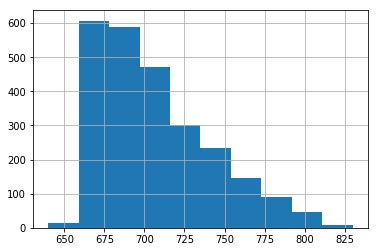

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
loansmin = pd.read_csv('../datasets/loanf.csv')
fico = loansmin['FICO.Score']
p = fico.hist()

### Box Plot

Next we take a box plot which allows us to quickly look at the distribution of interest rates based on each FICO score range.   

/home/marco/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


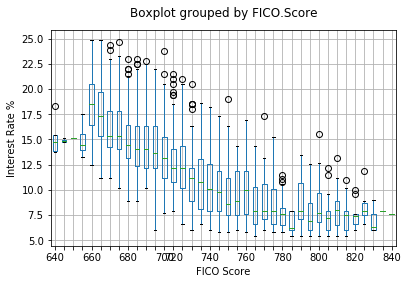

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
loansmin = pd.read_csv('../datasets/loanf.csv')

p = loansmin.boxplot('Interest.Rate','FICO.Score')
q = p.set_xticklabels(['640','','','','660','','','','680','','','','700',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])

q0 = p.set_xlabel('FICO Score')
q1 = p.set_ylabel('Interest Rate %')
q2 = p.set_title('                          ')


We're going to look at a scatterplot matrix of the five variables in our data.

<img src="../images/important.png" />

/home/marco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


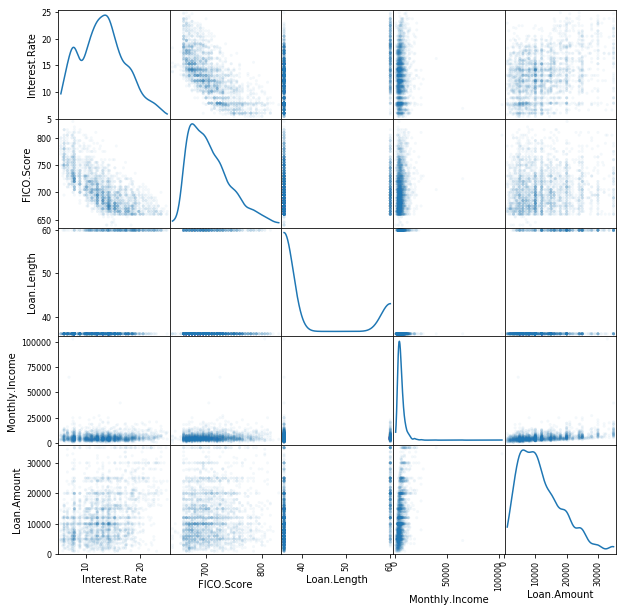

In [7]:
## TRY THIS!
import pandas as pd
loansmin = pd.read_csv('../datasets/loanf.csv')
a = pd.scatter_matrix(loansmin,alpha=0.05,figsize=(10,10), diagonal='kde')
## Click on the line above
## Change 'hist' to 'kde' then hit shift-enter, with the cursor still in this box
## The plot will redraw - it takes a while. While it is recomputing you will see a 
## message-box that says 'Kernel Busy' near the top right corner
## You can change the code and hit shift-enter to re-execute the code
## Try changing the (10,10) to (8,8) and (12,12)
## Try changing the alpha value from 0.05 to 0.5 
## How does this change in alpha change your ability to interpret the data?
## Feel free to try other variations. 
## If at any time you scramble the code and forget the syntax 
## a copy of the original code is below. Copy and paste it in place. 
## Remember to remove the hashmarks.
## a = pd.scatter_matrix(loansmin, alpha=0.05,figsize=(10,10), diagonal='hist)


In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()